# Chapter 3 - Classification
## MNIST dataset 
### Multioutput Classification System

It is a generalization of multilabel where each label can be multiclass (it can have more than two possible values).



First of all, let's fetch our mnist data:

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

Let's create the following variables:
- `X`: contains the full dataset
- `y`: contains the labels
- `X_train`: Training set
- `X_test`: Test set
- `y_train`: Labels training set
- `y_test`: Labels test set

In [3]:
import numpy as np
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

some_digit = X[0]

To illustrate this, let's build a system that removes noise from images. It'll take as input a noisy digit image, and it will output a clean digit image.

Let's start by creating the  training and test sets by taking the mnist images and adding noise to their pixel intensities with NumPy's `randint()`function. The target images will be, of course, the original images:

In [5]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

kn_clf = KNeighborsClassifier()
kn_clf.fit(X_train_mod, y_train_mod)
clean_digit = kn_clf.predict([X_test_mod[0]])
clean_digit_img = clean_digit.reshape(28, 28)

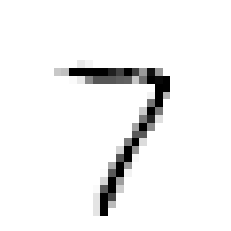

In [11]:
plt.imshow(clean_digit_img, cmap="binary")
plt.axis("off")
plt.show()